# How Many Tablets/Capsules Would It Take to Reach the Alleged Genotoxic Dose?

By: Lyle D. Burgoon, Ph.D., President and CEO of Raptor Pharm & Tox, Ltd.

Date of original analysis: 9/1/2022

I have evaluated each of the studies cited by the European Food Safety Authority as being positive for genotoxicity. All of the studies have demonstrable flaws. In all cases, the study design and/or analyses were not performed correctly. As a result, there is no evidence that titanium dioxide causes genotoxicity.

However, what if the studies were right? What if 80ug/mL of titanium dioxide really was genotoxic? 

How many tablets or capsules would someone need to ingest every day to reach that genotoxic dose? Well, in the worst case scenario it would take 681 tablets, taken every 6hrs (or 4 times a day), every day for about 8.5 years to reach the genotoxic dose.

# Analysis

I'm going to set the time range and initialize the TiO2 concentration. The time range will extend to 10 years and it will be hourly.

In [1]:
time_range <- 365 * 24 * 10
x <- 0

We need to make a few worst case assumptions. I requested information on the maximum TiO2 levels in various tablets and capsules in the market from various industry groups and pharmaceutical companies, along with the highest dosing levels we might expect for most drugs. The maximum amount of TiO2 that can be put into a tablet is going to be 15mg. The maximum that can be put into a capsule is going to be 4.8mg. Because tablets can have more TiO2 than capsules, and given we want the worst case scenario, we'll go with 15mg tablets in our analysis.

Also consider that in our worst case scenario a person may take 2 tablets 4x per day. Let's also say that the person takes 5 similar tablets (of different drugs) at the same dosing frequency. So 2 x 4 x 5 = 40 tablets per day. That means that the person will ingest a total of 40 * 15mg = 600mg of TiO2 per day. Our model will account for the 4x per day (q.i.d.) administration. Altogether, based on my knowledge, training, and experience as a pharmacologist and toxicologist, this definitely appears to be a worst case scenario that would exceed typical levels that patients would encounter.

Also consider that we generally assume humans have 5L of blood.

The data from [Disdier et al.](https://link.springer.com/article/10.1186/s12989-015-0102-8) shows that 2% of the total TiO2 dose, when given intravenously, ended up in the spleen. That same study also demonstrated a half-life of around 365 days for TiO2 in the spleen.

Using this information, and the well-known equation for the half-life of a chemical we can estimate the clearance rate. Specifically, the clearance rate is the amount of blood that is cleared of a chemical per unit time, typically 1 hour.

That equation is given in [StatPearls](https://www.ncbi.nlm.nih.gov/books/NBK545280/) as:

$$ t_{1/2} = \frac{0.693 * V_d}{CL} $$

What this means is that the half-life ($ t_{1/2} $) is a function of the volume of distribution ($ V_d $) divided by the clearance rate ($ CL $). We can re-arrange this algabraically to calculate the clearance rate:

$$ CL = \frac{(0.693 * V_d)}{t_{1/2}} $$

From Disdier et al. we have the half-life. We now need to calculate the volume of distribution:

$$ V_d = \frac{A_t}{C_t} $$

This means that the volume of distribution, $V_d$, is a function of the amount of chemical in the body at time = t, $A_t$, divided by the plasma chemical concentration at time = t, $C_t$. We know that in the Disdier et al. study the animals were dosed with 1mg/kg of TiO2 intravenously. Since this was intravenous administration, we know that all of the chemical made it into the blood. The average weight of the rats in the study was about 215g. That means that the total amount of drug administered IV was:

$$ (1 \frac{mg}{kg}) * (.215kg) = 0.215mg $$

The plasma concentration at time 0, when the total amount of drug was administered was 39 ng/g. So I'll convert this to mg/L next:

$$ (39 \frac{ng}{g}) * (1.03 \frac{g}{mL}) * (\frac{1 g}{1e9 ng}) * (1000 \frac{mg}{g}) * (1000 \frac{mL}{L}) = 0.04mg/L $$

Now that we have the plasma concentration at time 0, and we know the administered dose at time 0 (which is the amount of chemical in the body at time 0), we can calculate the volume of distribution:

$$ Vd = \frac{0.215 mg}{0.04 mg/L} = 5.375 L $$

And now that we have the volume of distribution, we can calculate the clearance rate:

$$ CL = \frac{(0.693 * V_d)}{t_{1/2}} $$

$$ CL = \frac{(0.693 * 5.375 L)}{365 days * 24 \frac{h}{day}} $$

$$ CL = 4.25x10^{-4} L/h $$

This clearance rate represents the amount of plasma that is completely rid of the drug per hour. We will use this in the 1-compartment pharmacokinetic model.

Now, you might ask why am I doing a simplistic 1-compartment model when I have data for other organs. The reason is simple. I do not need complete accuracy. I need a model that is good enough to estimate the number of tablets. I could build a more complete model, but given the fact that the spleen has such a large half-life compared to all of the other compartments/organs, and given the fact that liver will clear TiO2 faster, and the fact that spleen has such low absorption that means the other compartments will have very little impact on the spleen's concentrations of TiO2. In addition here's the biggest factor:

The dose required to see genotoxicity according to the studies identified by EFSA is typically around 80ug/mL. That is equivalent to 80mg/L. If we convert this to molar concentration it is:

$$ (80 \frac{mg}{L}) * (1 \frac{g}{1000 mg}) * (1 \frac{mole}{79.866 g}) = (0.001 \frac{mol}{L}) * (1000 \frac{mmol}{mol}) = 1 mmol/L = 1 mM $$

Consider that most drugs are designed to show their biological effects in the nanomolar range ($ 1x10^{-6} mM $) and hormones tend to be in the picomolar range ($ 1x10^{-9} mM $). Put another way, we do not normally consider mg/L chemical concentrations to be human relevant, and you'll see why at the end of this analysis. 

Next, I'm going to encode the dosage information for the analysis, and create a placeholder object in R to hold the hourly TiO2 concentration data for the spleen.

In this case the dose is going to be 10 tablets containing TiO2 every 6hrs, with 15mg per tablet, or 150mg every 6hrs, with 0.1% of the TiO2 being absorbed (see [EFSA safety assessment of titanium dioxide (E171) as a food additive](https://www.efsa.europa.eu/en/efsajournal/pub/6585)), and 2% of the absorbed TiO2 making it to the spleen, and the dose being deposited into 5L of blood:

In [2]:
dose <- 10 * 15 * 0.001 * 0.02 / 5  # mg of TiO2 absorbed per L of blood
vals <- NULL

The next code block will encapsulate the ordinary differential equation that governs the pharmacokinetic model. In this case the model is pretty straightforward, so I can just run it through a for loop:

In [3]:
for(i in 1:time_range){
  if(i == 1){
    x <- dose
  }
  x <- ((5 * x) - (x * 4.25e-4))/5
  
  if(i %% 6 == 0){
    x <- x + dose
  }
  vals[i] <- x
}


Next, I'm going to visualize the data:

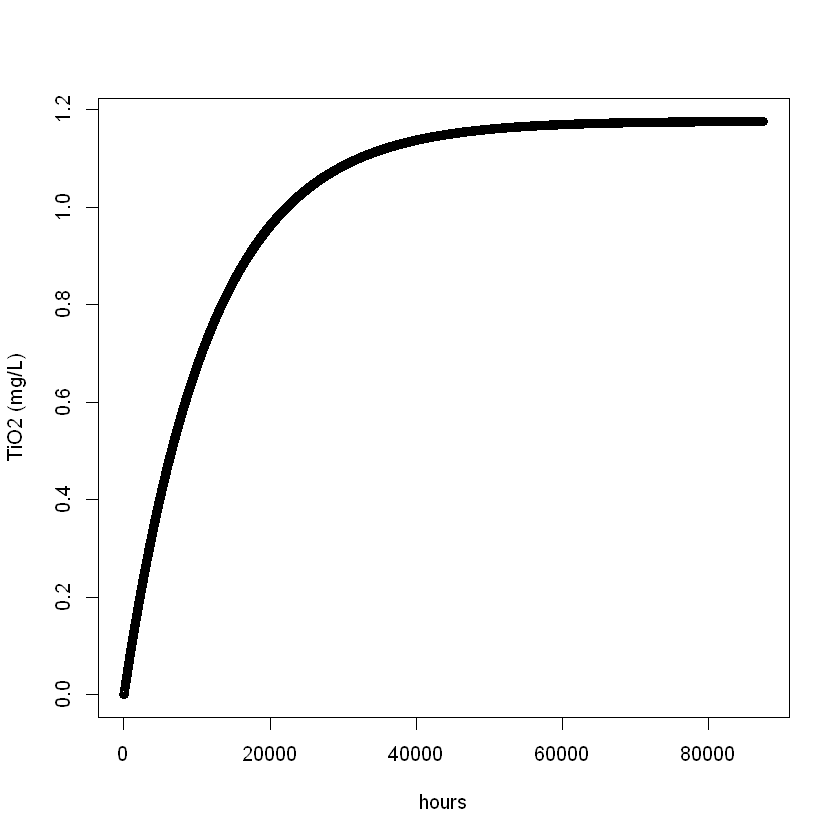

In [4]:
plot(vals, xlab="hours", ylab="TiO2 (mg/L)")

We can see that at 10 tablets every 6hrs, or 40 tablets total per day, the highest the splenic concentration of TiO2 will reach is just under 1.2mg/L. That is well below the 80mg/L where the studies cited by EFSA saw genotoxicity.

What I found is that we need to take the dose up to 681 tablets every 6hrs to finally reach the 80mg/L level at steady state. Here's the analysis:

[1] 80.08793

[1] "how many years to reach 80mg/L:  8.57945205479452"


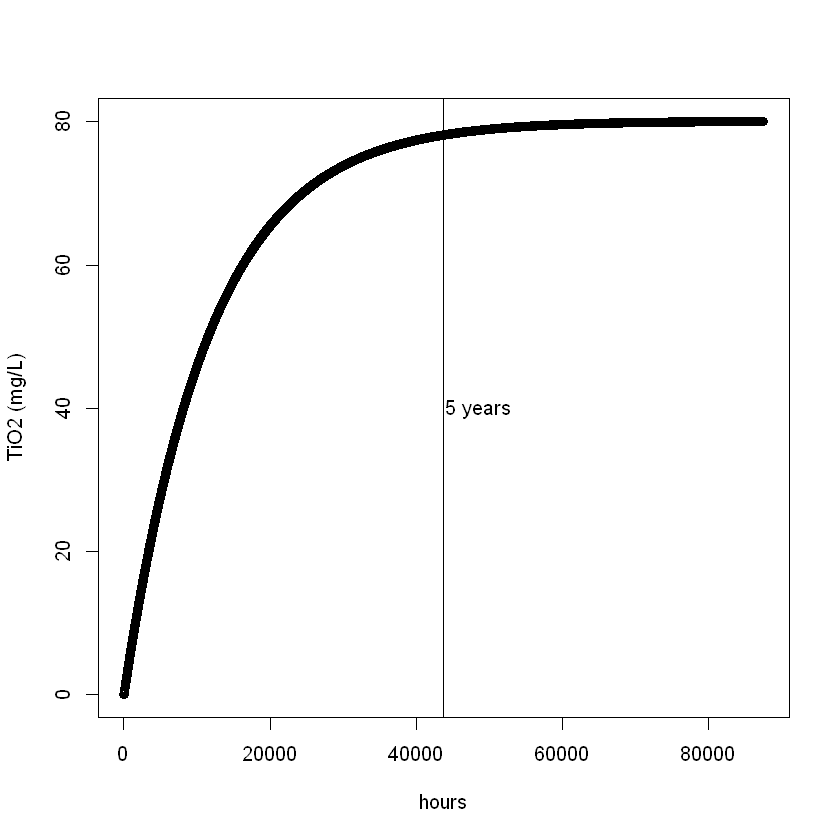

In [5]:
dose <- 681 * 15 * 0.001 * 0.02 / 5  # mg of TiO2 absorbed per L of blood
vals <- NULL

for(i in 1:time_range){
  if(i == 1){
    x <- dose
  }
  x <- ((5 * x) - (x * 4.25e-4))/5
  
  if(i %% 6 == 0){
    x <- x + dose
  }
  vals[i] <- x
}

plot(vals, xlab="hours", ylab="TiO2 (mg/L)")
abline(v=24*365*5)
text(x=48500, y = 40, "5 years")
max(vals)

# find how many days it would take to reach 80mg/L

print(paste("how many years to reach 80mg/L: ", min(which(vals > 80)) / 24 / 365))

Let's note a few things. In order to reach 80mg/L, and thus observe genotoxicity in the spleen, someone needs to ingest 681 tablets every 6 hours, every day, for 8 years and 219 days, a little over 8.5 years. 

But what if you wanted a loading dose -- a single dose in a single day that would get you to 80mg/L right away, and then you wanted to maintain that level for the rest of your life? How would you accomplish that?

[1] 32340.94

[1] "how many years to reach 80mg/L:  0.00273972602739726"
[1] "how many days to reach 80mg/L:  1"


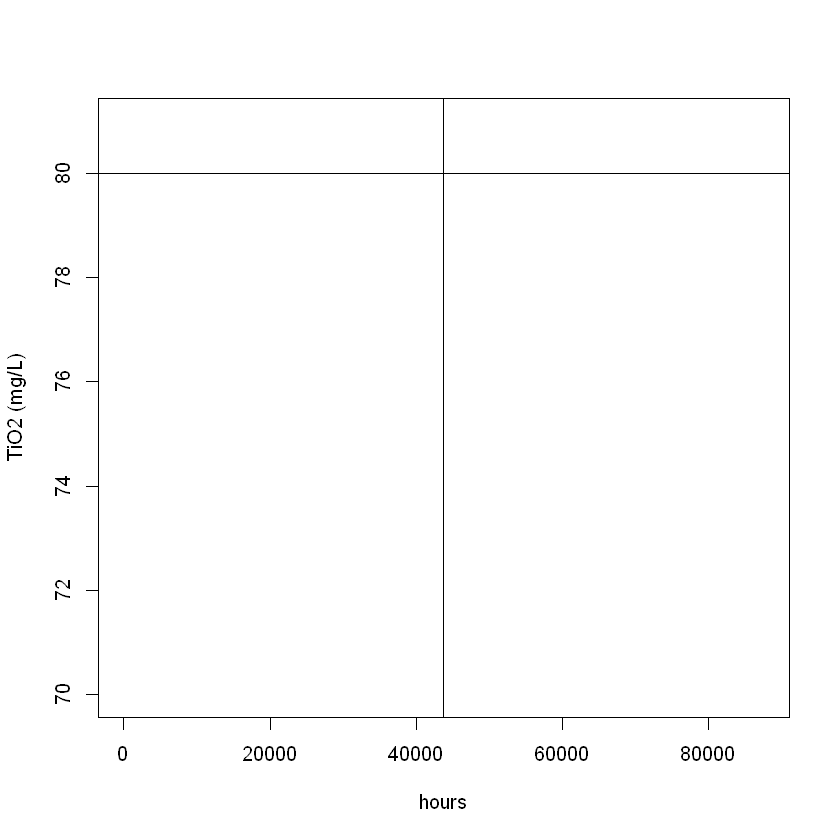

In [6]:
dose <- 275000 * 15 * 0.001 * 0.02 / 5  # mg of TiO2 absorbed per L of blood
vals <- NULL

for(i in 1:time_range){
  if(i == 1){
    x <- dose
  }
  x <- ((5 * x) - (x * 4.25e-4))/5
  
  if(i %% 6 == 0){
    x <- x + dose
  }
  vals[i] <- x
}

plot(vals, xlab="hours", ylab="TiO2 (mg/L)", ylim = c(70, 81))
abline(v=24*365*5, h=80)
text(x=48500, y = 40, "5 years")
max(vals)

# find how many days it would take to reach 80mg/L

print(paste("how many years to reach 80mg/L: ", min(which(vals > 80)) / 24 / 365))

print(paste("how many days to reach 80mg/L: ", min(which(vals > 80)) / 24))


Easy -- just ingest 275,000 tablets every 6 hours for one day.  

I'm pretty sure whether you're eating 681 or 275,000 tablets every 6hrs, every day, genotoxicity is the least of your concerns.

# Analysis 2: What About the Children

Children have less blood volume than adults. According to the [University of Iowa School of Medicine](https://medicine.uiowa.edu/iowaprotocols/maximum-allowable-blood-loss), most children will have a blood volume of 70-75 mL per kg of body weight. According to data from the CDC, via [Cincinnati Children's Hospital](https://www.cincinnatichildrens.org/health/g/normal-growth), most 4 year olds will weigh between 22-44 lbs; converting to kilograms that is approximately: 10-20 kg. If we were to estimate a 4 year old child at 15kg were taking the tablets, then we would estimate a blood volume of: (70 ml/kg) * 10 kg = 700 mL = 0.70 L. 

For this we'll assume everything else is the same, but we'll adjust the blood volume down from 5L to 0.7L.

[1] 80.00369

[1] "how many years to reach 80mg/L:  1.87671232876712"


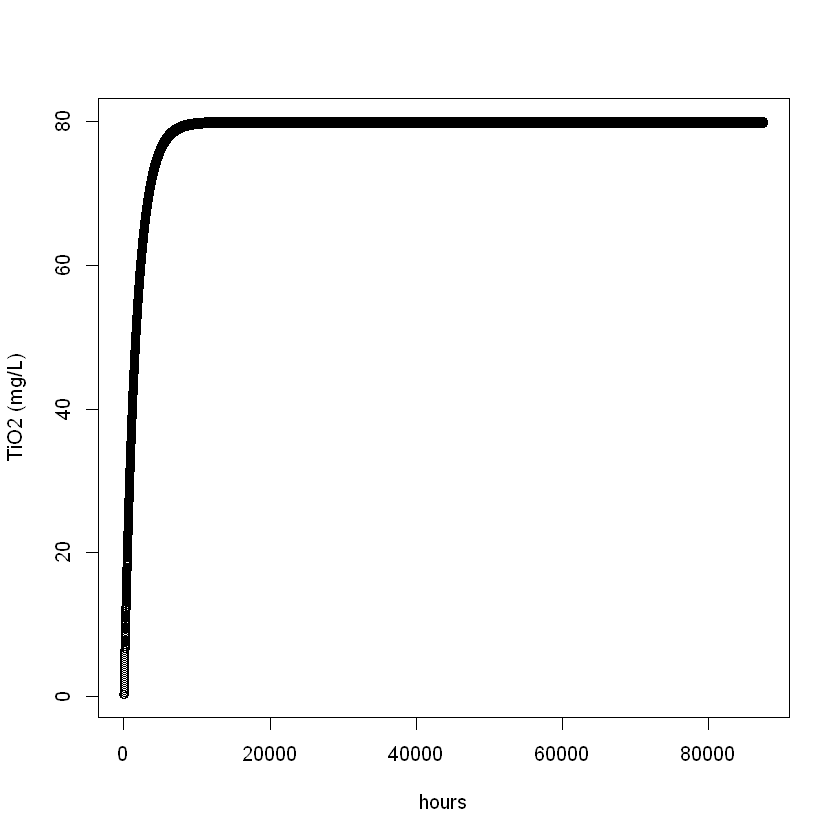

In [7]:
dose <- 679 * 15 * 0.001 * 0.02 / 0.70  # mg of TiO2 absorbed per L of blood
vals <- NULL

for(i in 1:time_range){
  if(i == 1){
    x <- dose
  }
  x <- ((0.70 * x) - (x * 4.25e-4))/ 0.70
  
  if(i %% 6 == 0){
    x <- x + dose
  }
  vals[i] <- x
}

plot(vals, xlab="hours", ylab="TiO2 (mg/L)")
max(vals)

# find how many days it would take to reach 80mg/L

print(paste("how many years to reach 80mg/L: ", min(which(vals > 80)) / 24 / 365))

In this worst case, a 4 year old child with a body weight on the lower side of normal, at 22 lbs, would need to ingest 679 tablets every 6hrs, every day, for 1.9 years, or 1 year and 329 days.